In [26]:
# Pandas for data loading, manipulation etc.
import pandas as pd

# Numeric functions
import numpy as np
from scipy import stats
from scipy.stats import norm
from collections import OrderedDict

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display

# Plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modeling
from sklearn.linear_model import SGDRegressor, ElasticNetCV, LogisticRegression
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier

# Imbalanced data
from imblearn.over_sampling import RandomOverSampler

# Ignore deprication warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading datasets into pandas dataframe
data = pd.read_csv(r"C:\Users\Spencer\Dropbox\School\Fall 2018\Machine Learning\Projects\Project\terrorism.csv", encoding="latin1")

In [3]:
print(data.shape)

(181691, 135)


In [4]:
target = data['gname']

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['casualities']=data['Killed']+data['Wounded']
data.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [6]:
target.value_counts()

Unknown                                                             82782
Taliban                                                              7478
Islamic State of Iraq and the Levant (ISIL)                          5613
Shining Path (SL)                                                    4555
Farabundo Marti National Liberation Front (FMLN)                     3351
Al-Shabaab                                                           3288
New People's Army (NPA)                                              2772
Irish Republican Army (IRA)                                          2671
Revolutionary Armed Forces of Colombia (FARC)                        2487
Boko Haram                                                           2418
Kurdistan Workers' Party (PKK)                                       2310
Basque Fatherland and Freedom (ETA)                                  2024
Communist Party of India - Maoist (CPI-Maoist)                       1878
Maoists                               

In [7]:
print(data.shape)

(181691, 18)


In [8]:
print('Country with Highest Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',data['Killed'].max(),'that took place in',data.loc[data['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


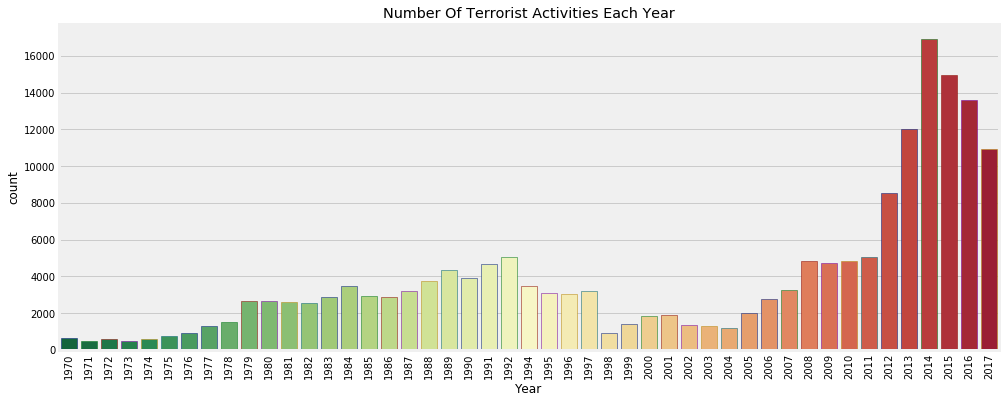

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

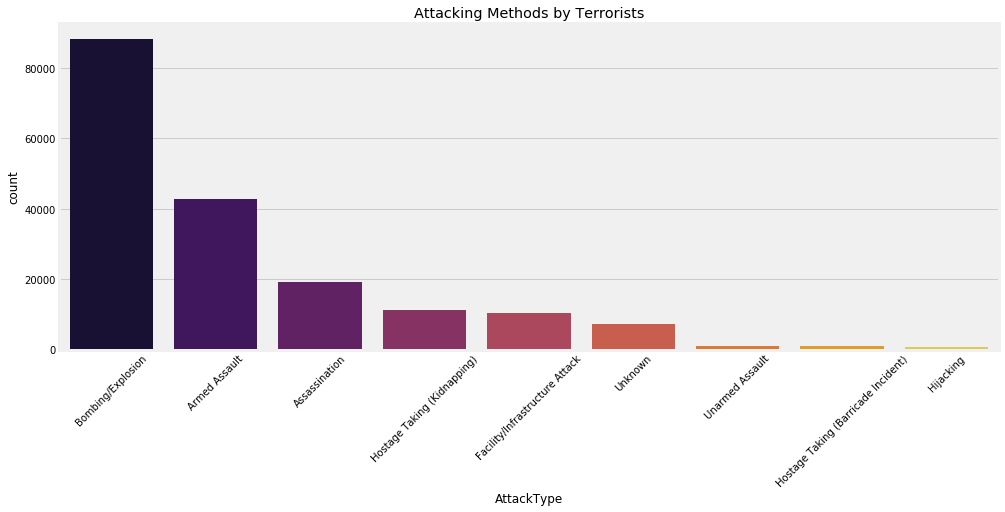

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=data,palette='inferno',order=data['AttackType'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Attacking Methods by Terrorists')
plt.show()

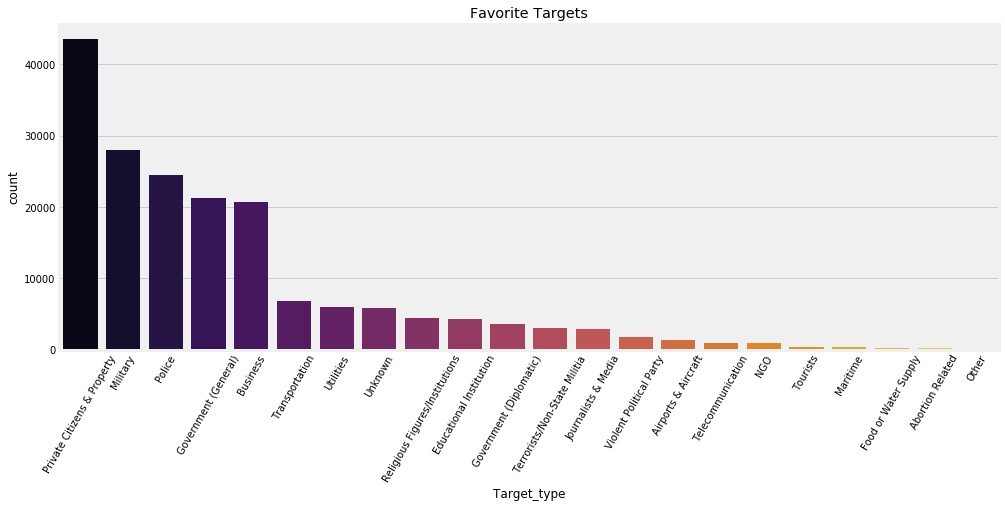

In [20]:
plt.subplots(figsize=(15,6))
sns.countplot(data['Target_type'],palette='inferno',order=data['Target_type'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Favorite Targets')
plt.show()

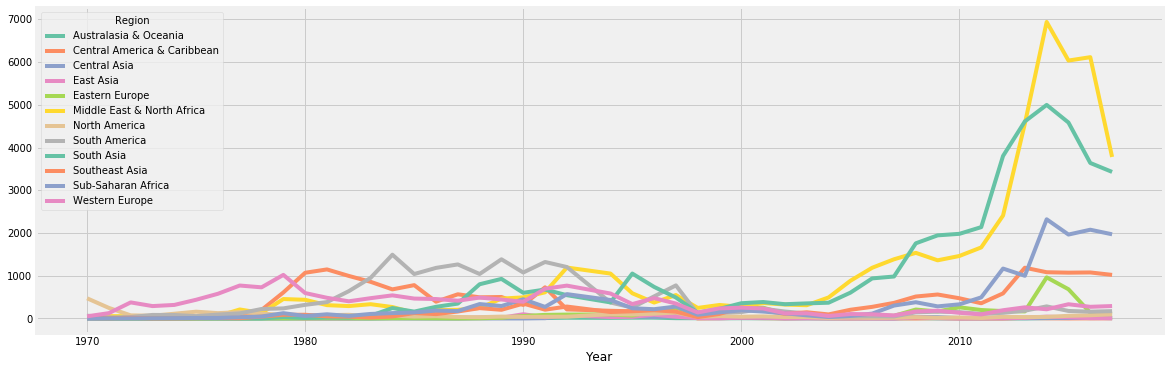

In [12]:
terror_region=pd.crosstab(data.Year,data.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

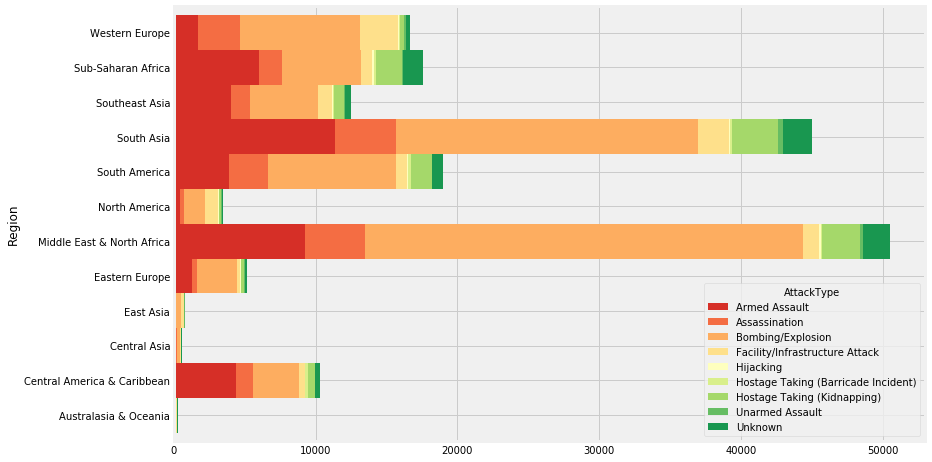

In [13]:
pd.crosstab(data.Region,data.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

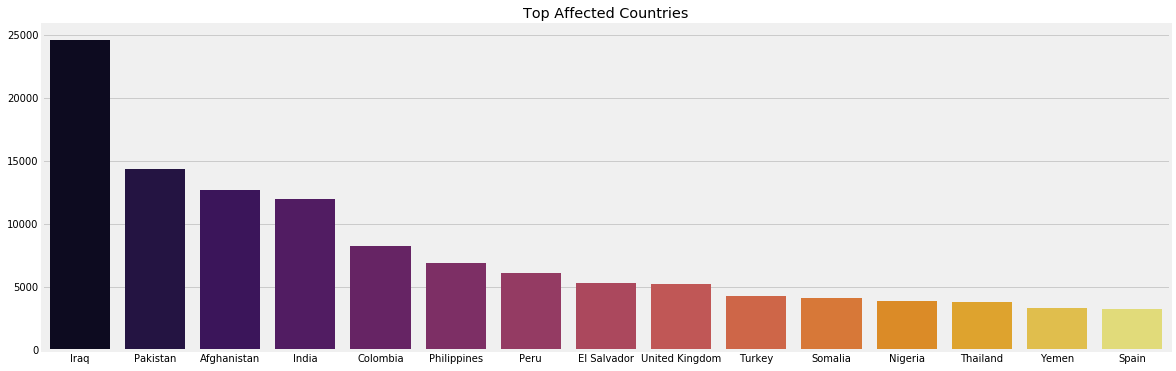

In [14]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

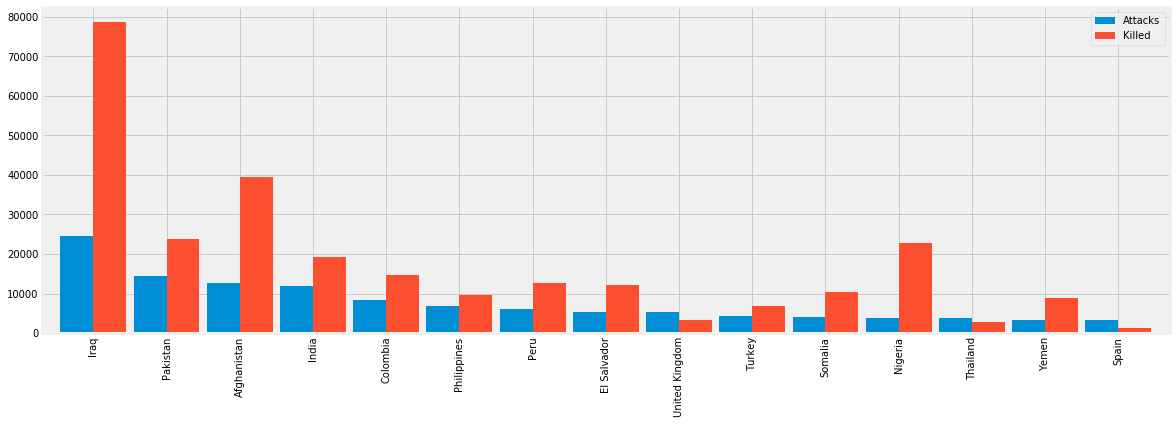

In [15]:
coun_terror=data['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=data.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

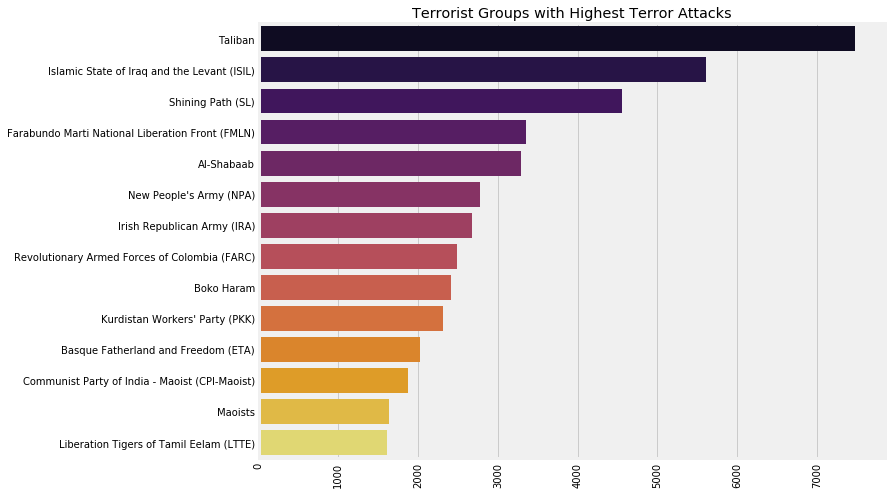

In [16]:
sns.barplot(data['Group'].value_counts()[1:15].values,data['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

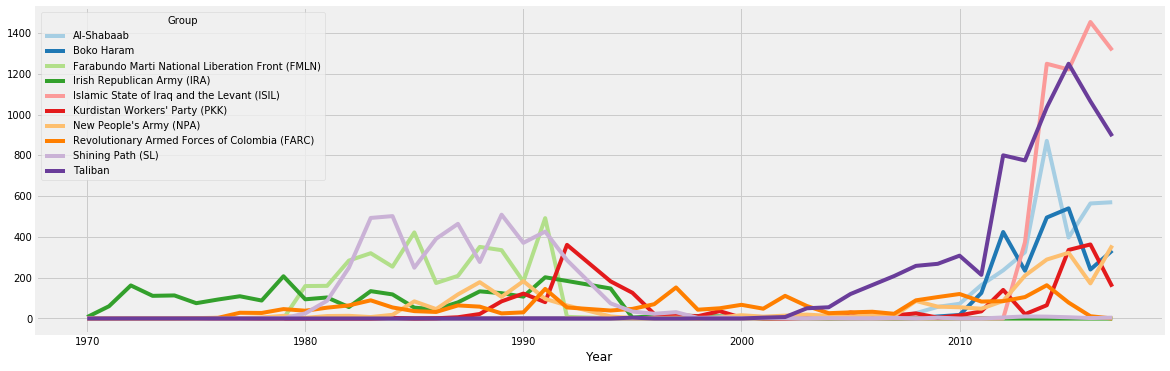

In [17]:
top_groups10=data[data['Group'].isin(data['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

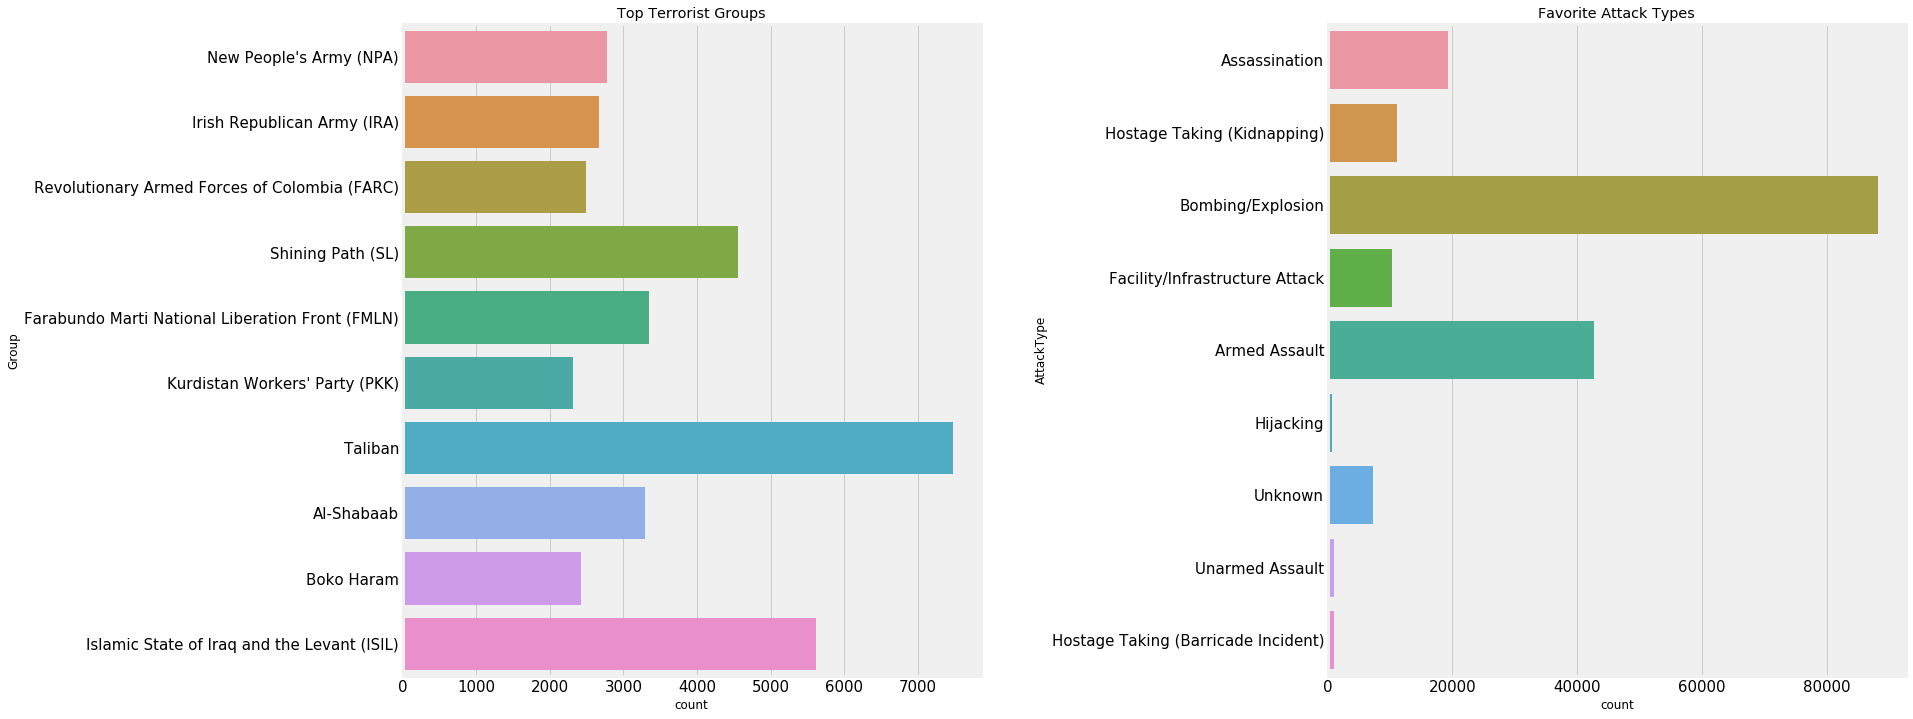

In [24]:
f,ax=plt.subplots(1,2,figsize=(24,12))

city_usa=data['city']
killed_usa=data['Killed']
wound_usa=data['Wounded']
target_usa=data['Target_type']

usa_groups=data['Group'].value_counts()[1:11].index
usa_groups=data[data['Group'].isin(usa_groups)]
sns.countplot(y='Group',data=usa_groups,ax=ax[0])
sns.countplot(y='AttackType',data=data,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

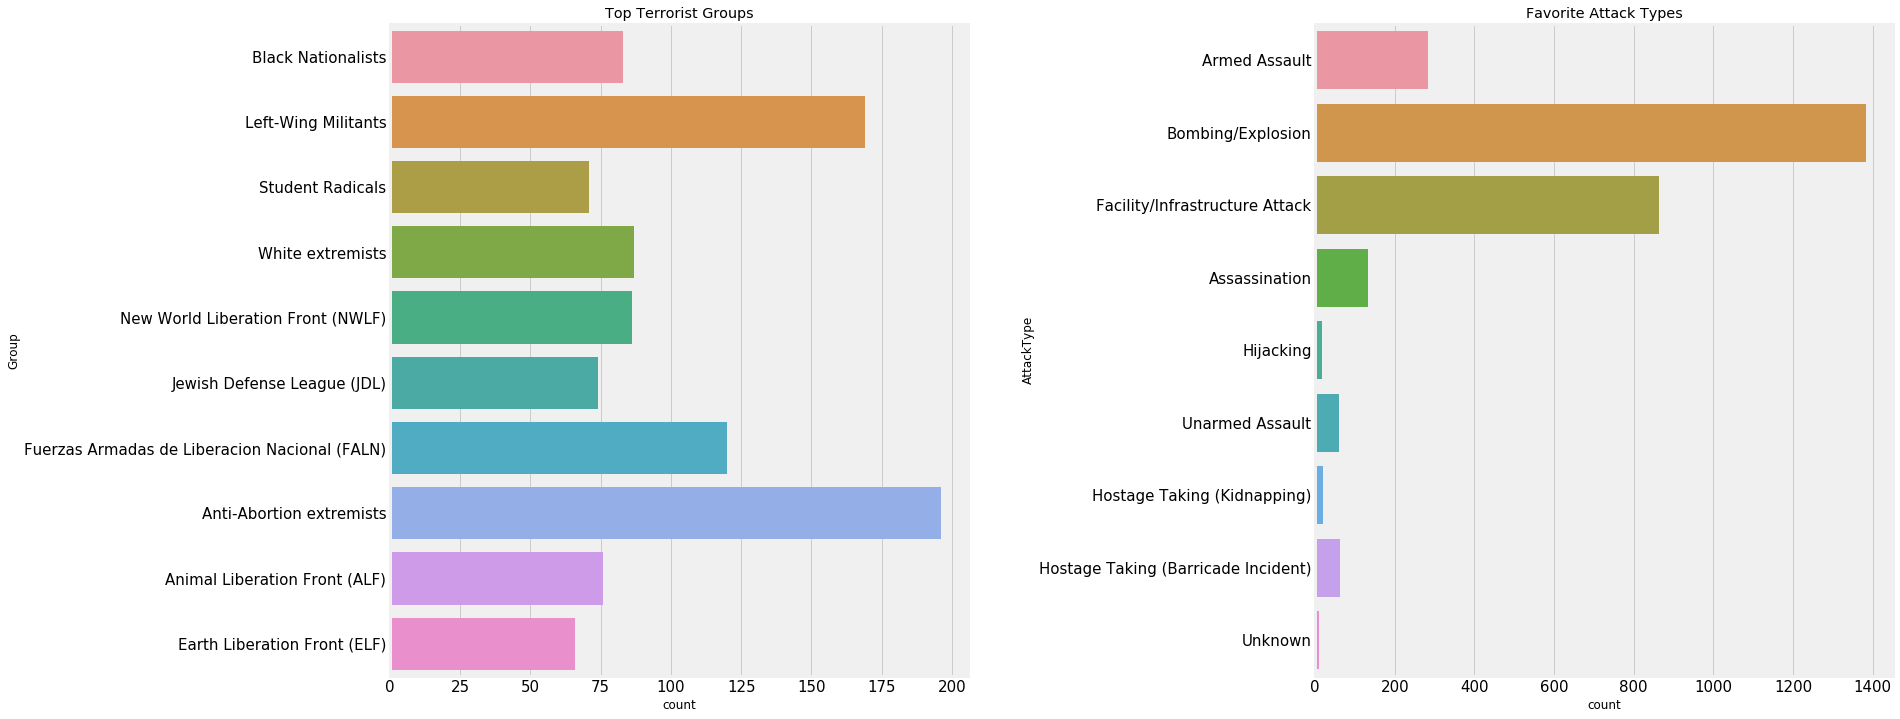

In [22]:
f,ax=plt.subplots(1,2,figsize=(24,12))
terror_usa=data[data['Country']=='United States']
terror_usa_fol=terror_usa.copy()
terror_usa_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_usa=terror_usa_fol[['latitude','longitude']]
city_usa=terror_usa_fol['city']
killed_usa=terror_usa_fol['Killed']
wound_usa=terror_usa_fol['Wounded']
target_usa=terror_usa_fol['Target_type']

usa_groups=terror_usa['Group'].value_counts()[1:11].index
usa_groups=terror_usa[terror_usa['Group'].isin(usa_groups)]
sns.countplot(y='Group',data=usa_groups,ax=ax[0])
sns.countplot(y='AttackType',data=terror_usa,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

In [ ]:
# Devestation Score
data_['devastation'] = data_['nkill'] + data_['nkillter'] + data_['nwound']

# Devestation Score + Property Damage
data_['devastation+'] = data_['propextent'] + data_['devastation']/10000

# Country of Attack + Weapon Type
data_['countryweapon'] = data_['country'] + (data_['weapsubtype1']/100)

# Country of Attack + Devestation Score + Property Damage 
data_['countrydevastation+'] = data_['country'] + data_['devastation+']/10

# Country of Attack + Year of Attack
data _['countryyear'] = data_['country']+(data_['iyear']-1950)/100